<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Import Needed Libraries
    </h1>
    </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Reading Dataset And Get Info
    </h1>
    </div>

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
# Show Sample of Data
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
97,98,Female,27,60,50
171,172,Male,28,87,75
183,184,Female,29,98,88
77,78,Male,40,54,48
177,178,Male,27,88,69


In [4]:
# Show Shape of Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 200
Number of Columns : 5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Check NaN Value
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Describe Numiric Data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
CustomerID,200,0,0.0,200
Genre,200,0,0.0,2
Age,200,0,0.0,51
Annual Income (k$),200,0,0.0,64
Spending Score (1-100),200,0,0.0,84


In [9]:
# Check Dublication
df.duplicated().sum()

0

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Detection Outliers 
    </h1>
    </div>

In [11]:
def detect_outliers_iqr(df, columns, threshold = 1.5):

    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Finding outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers
    
    return outlier_indices

numerical_columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
outliers_iqr = detect_outliers_iqr(df, numerical_columns)

for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers detected")

Age: 0 outliers detected
Annual Income (k$): 2 outliers detected
Spending Score (1-100): 0 outliers detected


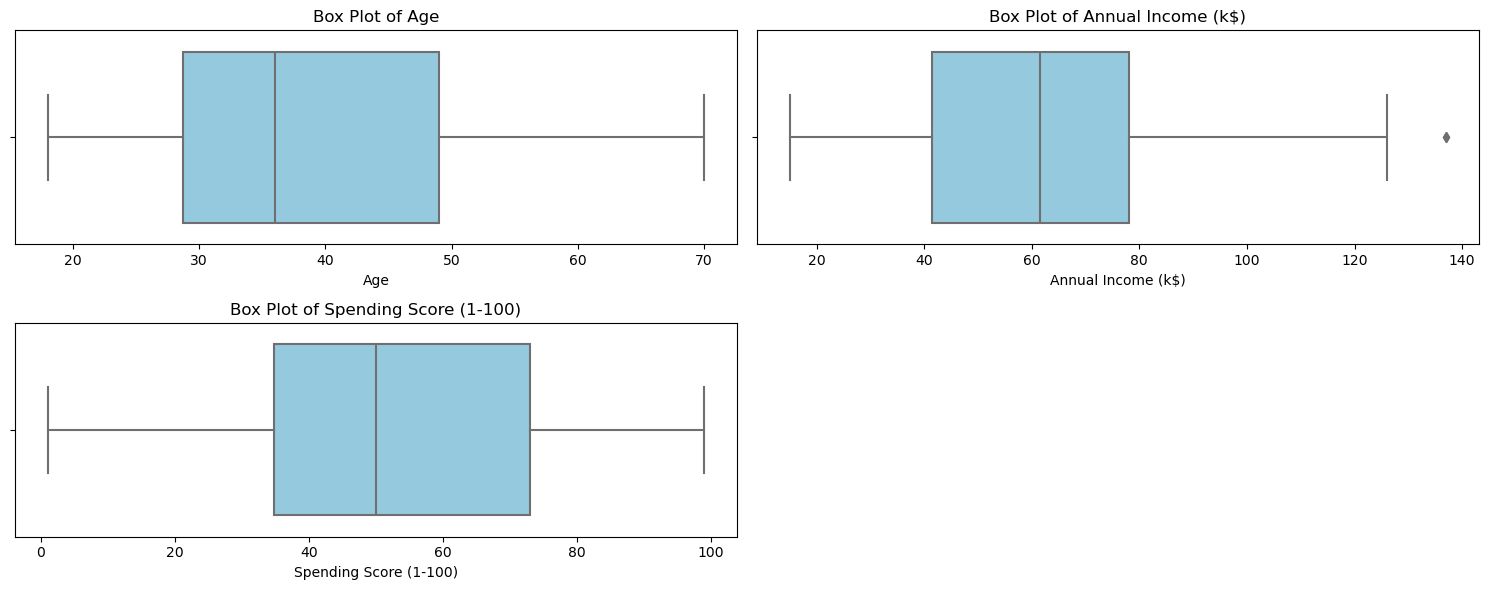

In [12]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(x = df[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout() 
plt.show()

In [13]:
def remove_outliers(df, columns, threshold=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)  # First quartile (25%)
        Q3 = df_clean[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        df_clean = df_clean[(df_clean[col] > lower_bound) & (df_clean[col] < upper_bound)]
    
    return df_clean

df_cleaned = remove_outliers(df, numerical_columns)

In [14]:
# The New of Shape Cleaned Data
print(f"Number of Row : {df_cleaned.shape[0]}\nNumber of Columns : {df_cleaned.shape[1]}")

Number of Row : 198
Number of Columns : 5


#### Cleaned Data BoxPlot To Show Outliers

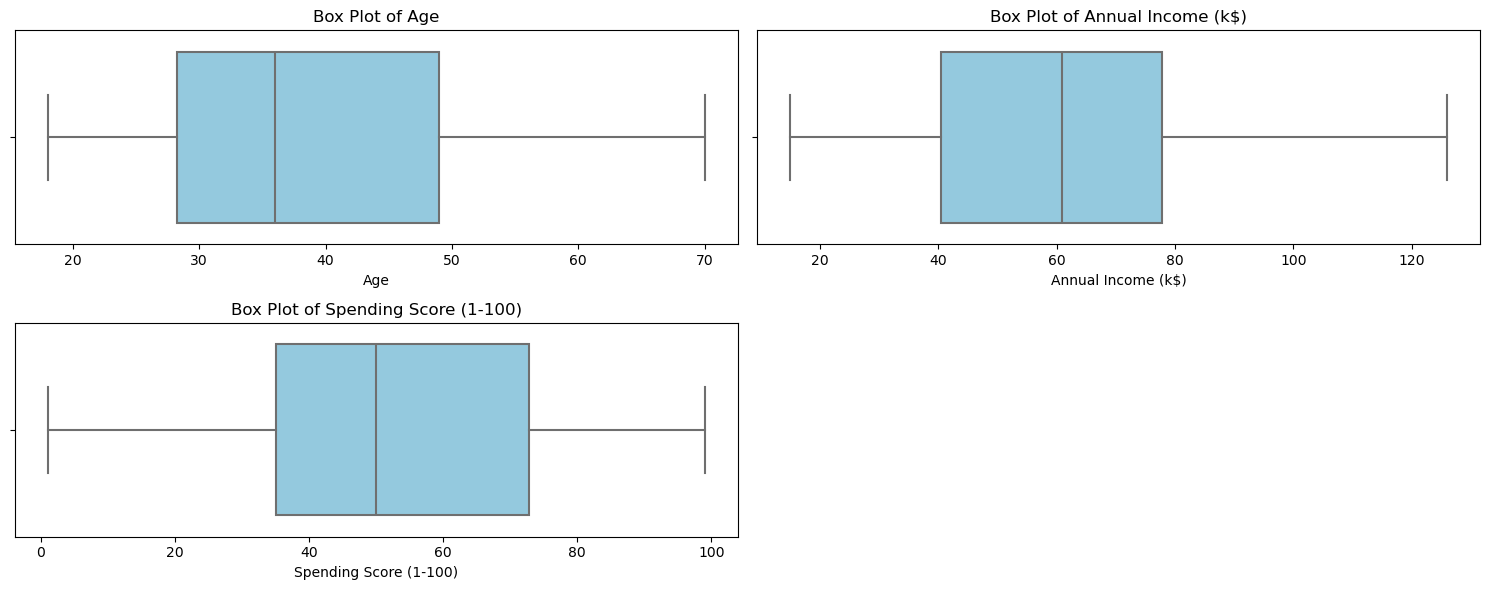

In [16]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i) 
    sns.boxplot(x = df_cleaned[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

In [18]:
df_cleaned.reset_index(inplace = True , drop = True)
df_cleaned.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
164,165,Male,50,85,26
132,133,Female,25,72,34
29,30,Female,23,29,87
143,144,Female,32,76,87
131,132,Male,39,71,75


In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              198 non-null    int64 
 1   Genre                   198 non-null    object
 2   Age                     198 non-null    int64 
 3   Annual Income (k$)      198 non-null    int64 
 4   Spending Score (1-100)  198 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         EDA of Data and Get Insights
    </h1>
    </div>

## Number of males and females in the data

In [27]:
fig = px.pie(values = df_cleaned['Genre'].value_counts(),
             names = df_cleaned['Genre'].value_counts().index,
             template = 'plotly_dark',
             title = 'Genre of Customer in the Mall'
             ).update_traces(textinfo='label+percent')

fig.show()

- The majority of Customers are Female

## Age distribution in the data

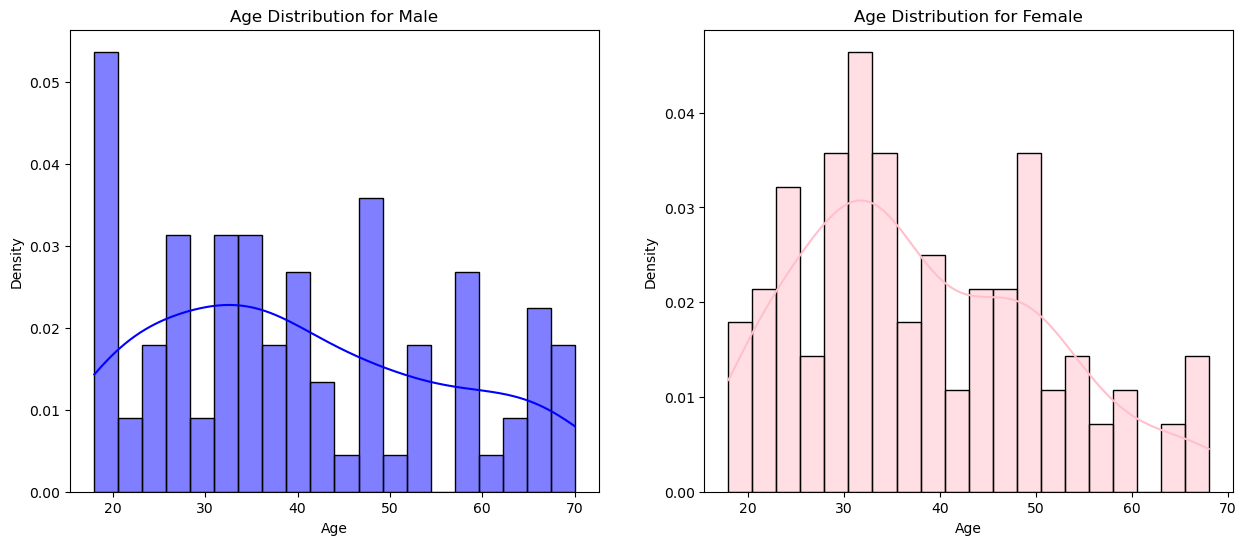

In [31]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)

sns.histplot(df_cleaned[df['Genre'] == 'Male']['Age'], color='blue', kde=True, bins=20, stat='density')
plt.title('Age Distribution for Male')

plt.subplot(1,2,2)

sns.histplot(df_cleaned[df['Genre'] == 'Female']['Age'], color='pink', kde=True, bins=20, stat='density')
plt.title('Age Distribution for Female')

plt.show()

- The age Range of Male clients is around the age of 20
- The age Range of Female Clients is around the age of 30

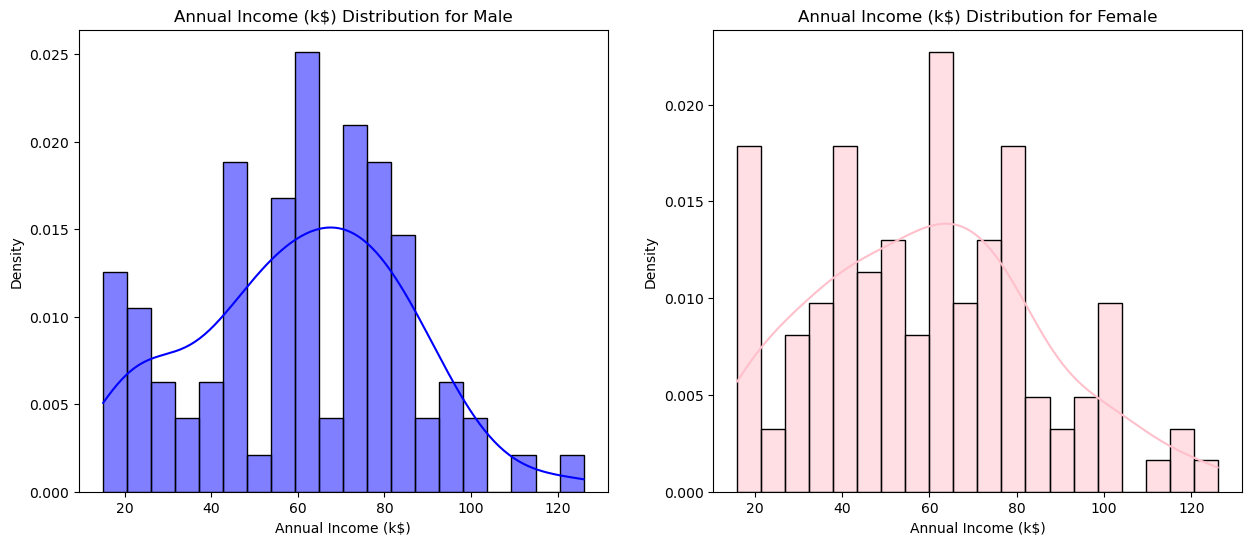

In [36]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)

sns.histplot(df_cleaned[df['Genre'] == 'Male']['Annual Income (k$)'], color='blue', kde=True, bins=20, stat='density')
plt.title('Annual Income (k$) Distribution for Male')

plt.subplot(1,2,2)

sns.histplot(df_cleaned[df['Genre'] == 'Female']['Annual Income (k$)'], color='pink', kde=True, bins=20, stat='density')
plt.title('Annual Income (k$) Distribution for Female')

plt.show()

- The annual income (one thousand dollars) for males and females ranges from about 60 thousand dollars

In [51]:
fig = px.scatter(df_cleaned,
                 df_cleaned['Age'],
                 df_cleaned['Annual Income (k$)'],
                 template = 'plotly_dark',
                 color = df_cleaned['Annual Income (k$)'],
                 title = 'Age VS Annual Income (k$)')
fig.show()

- Most Annual Income (k$) from age 30 to 50

In [52]:
fig = px.scatter(df_cleaned,
                 df_cleaned['Age'],
                 df_cleaned['Spending Score (1-100)'],
                 template = 'plotly_dark',
                 color = df_cleaned['Spending Score (1-100)'],
                 title = 'Age VS Spending Score (1-100)')
fig.show()

- Most Spending Score (1-100) from age 20 to 40

## Total Insights
- The majority of Customers are Female
- The age Range of Male clients is around the age of 20
- The age Range of Female Clients is around the age of 30
- The annual income (one thousand dollars) for males and females ranges from about 60 thousand dollars
- Most Annual Income (k$) from age 30 to 50
- Most Spending Score (1-100) from age 20 to 40

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Data Preprocessing
    </h1>
    </div>

### Drop Unnecessary Columns

In [59]:
df_cleaned.drop(columns=['CustomerID'],inplace = True)

### Encode Object DataType 

In [61]:
column_to_encode = df.select_dtypes(object).columns.tolist()
le = LabelEncoder()
for column in column_to_encode:
    df_cleaned[column] = le.fit_transform(df_cleaned[column])

In [64]:
# Final Info after Encode
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   198 non-null    int32
 1   Age                     198 non-null    int64
 2   Annual Income (k$)      198 non-null    int64
 3   Spending Score (1-100)  198 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 5.5 KB


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Modeling
    </h1>
    </div>

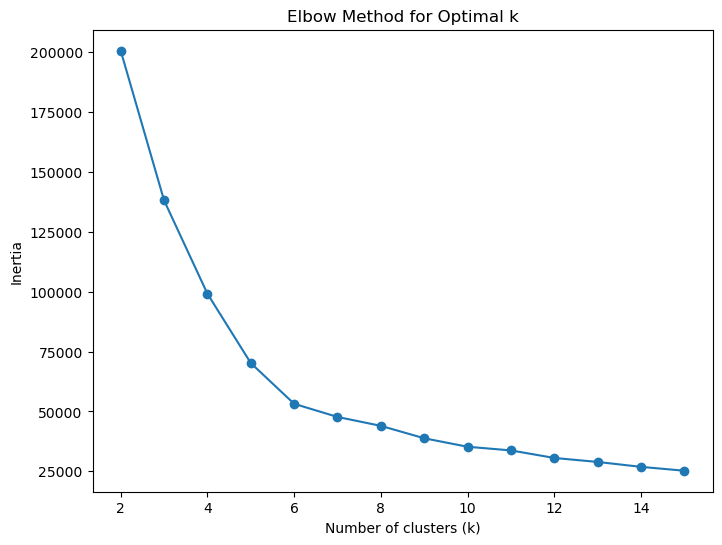

In [67]:
inertia = []
for i in range(2,16):
    kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state = 33 , algorithm = 'auto')
    kmeans.fit(df_cleaned)
    inertia.append(kmeans.inertia_)

# Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(2,16), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [69]:
# Apply K-means Clustering with k=5
kmeans = KMeans(n_clusters = 5 , init = 'k-means++' , random_state = 33 , algorithm = 'auto')
df_cleaned['KMeans_Cluster'] = kmeans.fit_predict(df_cleaned)

In [78]:
# Show Cluster Centers for each Cluster
pd.DataFrame(kmeans.cluster_centers_,columns=df_cleaned.columns[:-1])

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.391304,25.521739,26.304348,78.565217
1,0.417722,43.088608,55.291139,49.569620
2,0.391304,45.217391,26.304348,20.913043
3,0.514286,40.914286,86.342857,17.571429
4,0.447368,32.763158,85.210526,82.105263


In [82]:
fig = px.bar(df_cleaned['KMeans_Cluster'].value_counts(),
             color = df_cleaned['KMeans_Cluster'].value_counts().index,
             template = 'plotly_dark',
             title = 'Number of Customer in Each Cluster',
             labels = {'value':'Number of Customer'},
             text_auto = True
             )
fig.show()